In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
train_new_model = True

In [4]:
if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
 model = tf.keras.models.Sequential()

In [6]:
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2662 - accuracy: 0.9220
Epoch 2/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1084 - accuracy: 0.9665
Epoch 3/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9772
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0537 - accuracy: 0.9828
Epoch 5/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0411 - accuracy: 0.9865
Epoch 6/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0318 - accuracy: 0.9894
Epoch 7/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0252 - accuracy: 0.9916


In [9]:
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print(val_loss)
    print(val_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0932 - accuracy: 0.9760
0.0932309553027153
0.9760000109672546


In [10]:
model.save('handwritten_digits.model')

INFO:tensorflow:Assets written to: handwritten_digits.model\assets


INFO:tensorflow:Assets written to: handwritten_digits.model\assets


In [11]:
model = tf.keras.models.load_model('handwritten_digits.model')

In [12]:
image_number = 1

1/1 [==============================] - 0s 205ms/step
The number is probably a 7


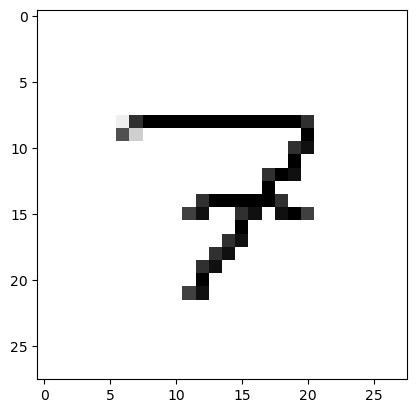

1/1 [==============================] - 0s 41ms/step
The number is probably a 2


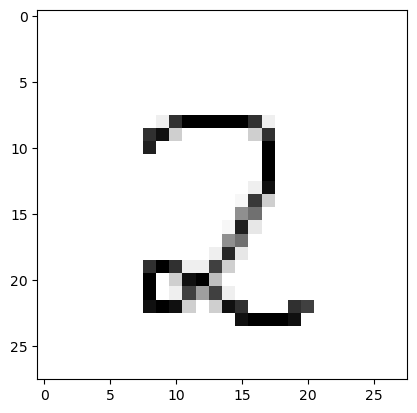

1/1 [==============================] - 0s 41ms/step
The number is probably a 9


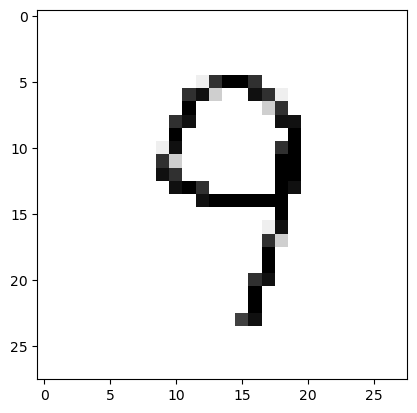

1/1 [==============================] - 0s 47ms/step
The number is probably a 8


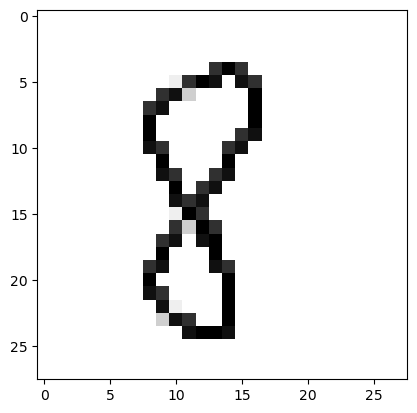

1/1 [==============================] - 0s 39ms/step
The number is probably a 5


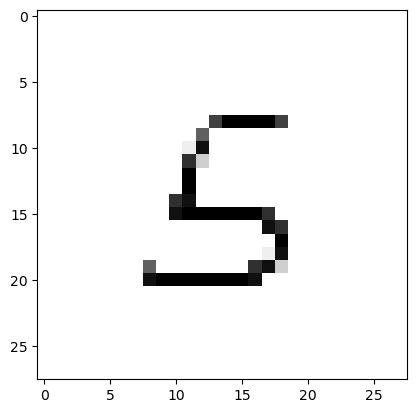

1/1 [==============================] - 0s 38ms/step
The number is probably a 6


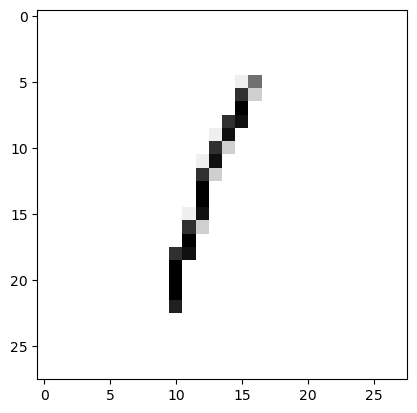

1/1 [==============================] - 0s 39ms/step
The number is probably a 1


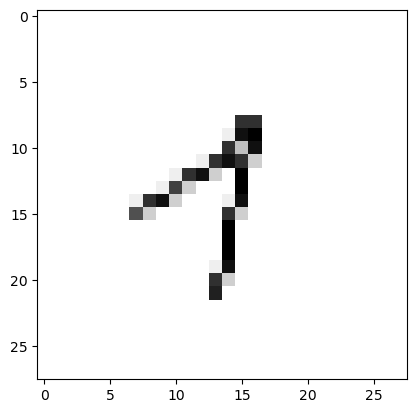

1/1 [==============================] - 0s 45ms/step
The number is probably a 1


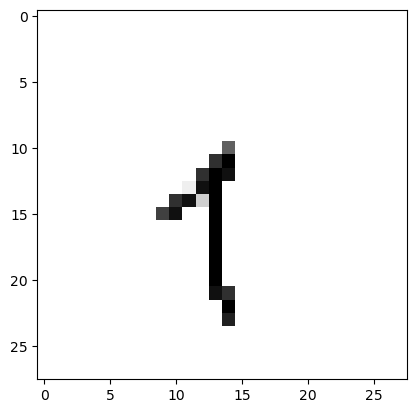

1/1 [==============================] - 0s 40ms/step
The number is probably a 7


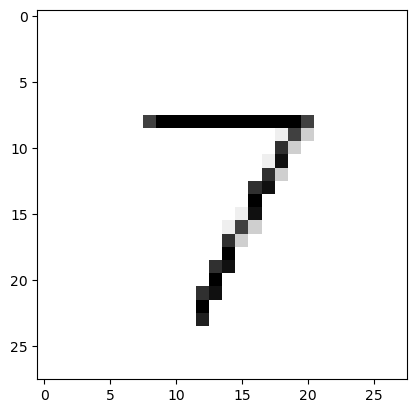

1/1 [==============================] - 0s 38ms/step
The number is probably a 7


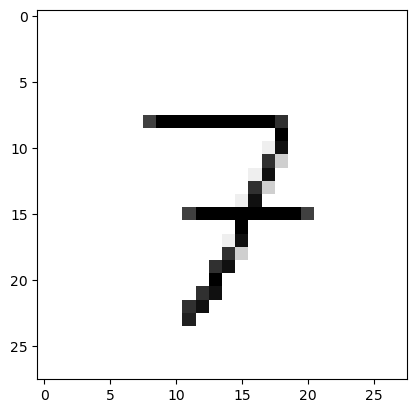

1/1 [==============================] - 0s 39ms/step
The number is probably a 0


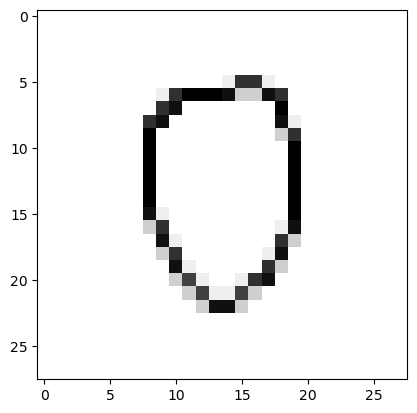

1/1 [==============================] - 0s 39ms/step
The number is probably a 1


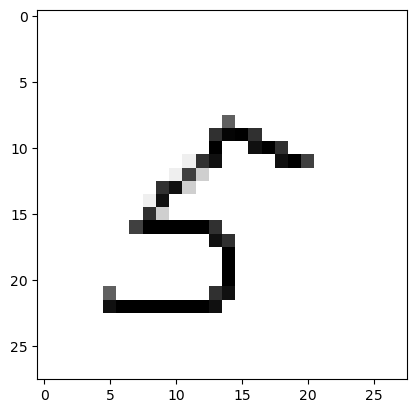

1/1 [==============================] - 0s 47ms/step
The number is probably a 7


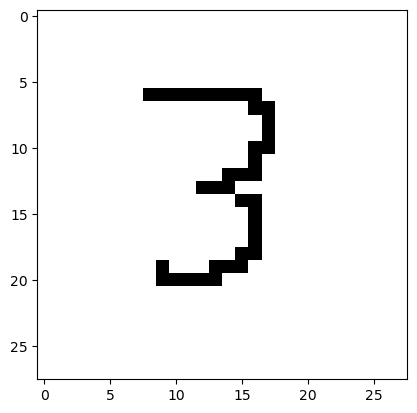

1/1 [==============================] - 0s 38ms/step
The number is probably a 2


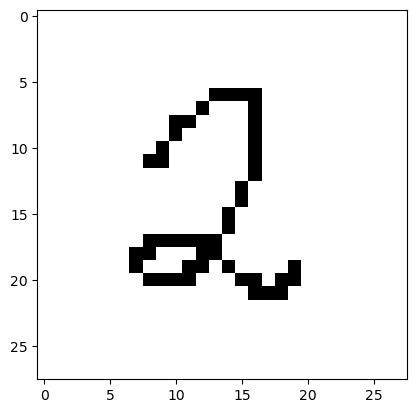

1/1 [==============================] - 0s 47ms/step
The number is probably a 1


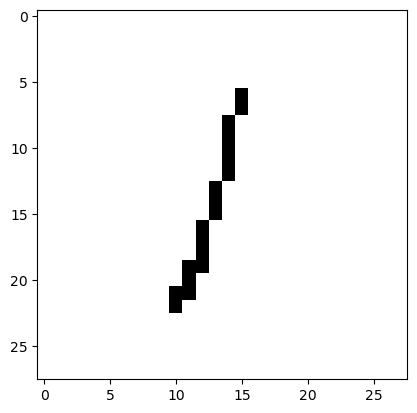

1/1 [==============================] - 0s 43ms/step
The number is probably a 0


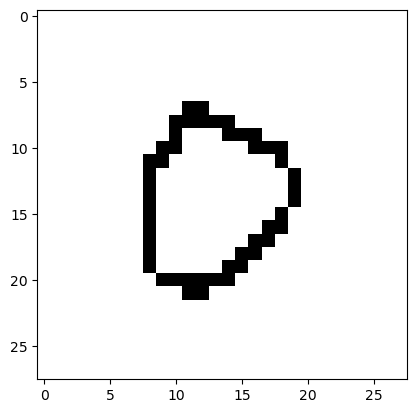

1/1 [==============================] - 0s 46ms/step
The number is probably a 1


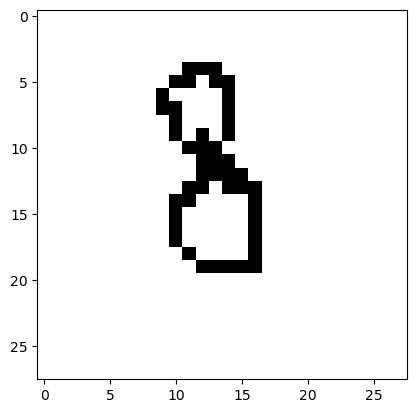

1/1 [==============================] - 0s 52ms/step
The number is probably a 7


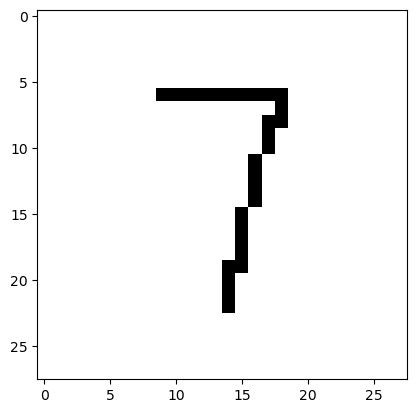

1/1 [==============================] - 0s 57ms/step
The number is probably a 4


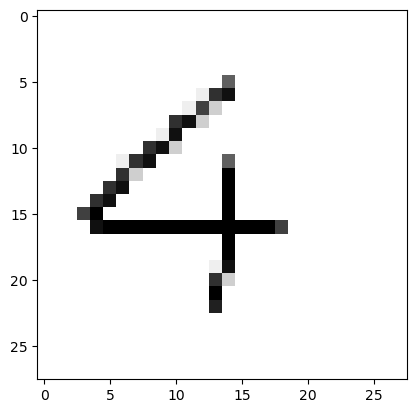

In [13]:
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1